##  데이터프레임 만들기

In [1]:
import pandas as pd

#독립변수 (2020년 데이터)
df_구리 = pd.read_csv("dataset/구리 선물 2020 2 1 2020 5 1.csv", encoding='utf-8')
df_금 = pd.read_csv("dataset/금 선물 2020 2 1 2020 5 1.csv", encoding='utf-8', thousands=',')
df_금리 = pd.read_csv("dataset/미국 10년물 국채 금리 채권 수익율 2020 2 1 ~ 2020 5 1.csv", encoding='utf-8')
df_비트코인 = pd.read_csv("dataset/비트코인 2020 2 1 2020 5 1.csv", encoding='utf-8', thousands=',')
df_삼성 = pd.read_csv("dataset/삼성전자 2020 0601 2020 0101.csv", encoding='cp949')
df_ndaq = pd.read_csv("dataset/NDAQ 2020 2 1 ~ 2020 5 1.csv", encoding='utf-8')
df_roc = pd.read_csv("dataset/roc_data 2020 05 01 ~ 2020 02 01.csv", encoding='utf-8')
df_rsi = pd.read_csv("dataset/rsi_data 2020 05 01 ~ 2020 02 01.csv", encoding='utf-8')
df_wti = pd.read_csv("dataset/WTI유 선물 2020 2 1 2020 5 1.csv", encoding='utf-8')

#종속변수 (2020년 데이터)
df_kodex = pd.read_csv("dataset/KODEX 200 2020 1 1 ~ 2020 6 1.csv", encoding='cp949') 

#테스트용 독립변수 (2021년 데이터)
df_구리_test = pd.read_csv("dataset/구리 선물 2021 2 1 2021 5 1.csv", encoding='utf-8')
df_금_test = pd.read_csv("dataset/금 선물 2021 2 1 2021 5 1.csv", encoding='utf-8', thousands=',')
df_금리_test = pd.read_csv("dataset/미국 10년물 국채 금리 채권 수익율 2021 2 1 ~ 2021 5 1.csv", encoding='utf-8')
df_비트코인_test = pd.read_csv("dataset/비트코인 2021 2 1 2021 5 1.csv", encoding='utf-8', thousands=',')
df_삼성_test = pd.read_csv("dataset/삼성전자 2021 0601 2021 0101.csv", encoding='cp949')
df_ndaq_test = pd.read_csv("dataset/NDAQ 2021 2 1 ~ 2021 5 1.csv", encoding='utf-8')
df_roc_test = pd.read_csv("dataset/roc_data 2021 05 01 ~ 2021 02 01.csv", encoding='utf-8')
df_rsi_test = pd.read_csv("dataset/rsi_data 2021 05 01 ~ 2021 02 01.csv", encoding='utf-8')
df_wti_test = pd.read_csv("dataset/WTI유 선물 2021 2 1 2021 5 1.csv", encoding='utf-8')

#테스트용 종속변수 (2021년 데이터)
df_kodex_test = pd.read_csv("dataset/KODEX 200 2021 1 1 ~ 2021 6 1.csv", encoding='cp949')

## 변동성 column 추가

단순한 종가를 독립변수로 하는 분류모델을 작성했을 때 독립변수의 절대적인 수치로 종속변수에 대한 insight을 얻기 힘들다 (삼성전자가 20000원일때는 전날에 비해서 종가가 상승으로예측, 23000원일때는 종가가 하락으로 예측했다면 이게 의미 있는 예측이 맞는지?) 따라서 독립변수에 상대적인 기준을 도입하기 위해 1일전 종가와의 변동성을 독립변수로 둔다 -> 전날에 비해 500원 떨어졌는데 주가가 또 하락하고 전날에 비해 1000원 상승했는데 주가가 또 상승했다면 의미있는 insight를 도출할 수 있다

In [2]:
df_구리['구리 변동성(수치)'] = df_구리['종가'].diff(periods=-1)
df_금['금 변동성(수치)'] = df_금['종가'].diff(periods=-1)
df_금리['금리 변동성(수치)'] = df_금리['종가'].diff(periods=-1)
df_비트코인['비트코인 변동성(수치)'] = df_비트코인['종가'].diff(periods=-1)
df_삼성 = df_삼성.rename(columns={'전일대비 등락':'삼성 변동성(수치)'})
df_ndaq['ndaq 변동성(수치)'] = df_ndaq['종가'].diff(periods=-1)
df_rsi = df_rsi.rename(columns={'전일대비 등락':'rsi'})
df_wti['wti 변동성(수치)'] = df_wti['종가'].diff(periods=-1)

df_구리_test['구리 변동성(수치)'] = df_구리_test['종가'].diff(periods=-1)
df_금_test['금 변동성(수치)'] = df_금_test['종가'].diff(periods=-1)
df_금리_test['금리 변동성(수치)'] = df_금리_test['종가'].diff(periods=-1)
df_비트코인_test['비트코인 변동성(수치)'] = df_비트코인_test['종가'].diff(periods=-1)
df_삼성_test = df_삼성_test.rename(columns={'전일대비 등락':'삼성 변동성(수치)'})
df_ndaq_test['ndaq 변동성(수치)'] = df_ndaq_test['종가'].diff(periods=-1)
df_rsi_test = df_rsi_test.rename(columns={'전일대비 등락':'rsi'})
df_wti_test['wti 변동성(수치)'] = df_wti_test['종가'].diff(periods=-1)

# 시점 일치

삼성과 kodex는 현재 시점이 일치하지 않으므로 삼성 주가 데이터를 다른 데이터들과 마찬가지로 2020 05 01 ~ 2020 02 01 사이의 값들이 될 수 있도록 일치시켜줘야 모델을 생성하기전에 조회날짜 데이터들을 문자열에서 datetime 형태로 변환하고 시점일치하는 row들만 모델 작업에 사용할 수 있도록 데이터 처리 필요

In [3]:
# 2020 0529 형태 -> 삼성, df_kodex
# 2020 05월 01일 형태 -> 구리, 금, 금리, 비트코인, ndaq, wti
# 2020-05-01 형태 -> roc, rsi

# 2020 0529 형태를 처리하기 위한 함수
def make_datetime(x) :
    
    x = str(x)
    
    str_val = ''
    str_val += x[0:4] + "-"
    str_val += x[4:6] + "-"
    str_val += x[6:]
    
    return str_val

def make_datetime2(x) : # 2020 05월 01일 형태를 처리하기 위한 함수
    x = str(x)
    
    str_val = ''
    str_val += x[0:4] + "-"
    str_val += x[6:8] + "-"
    str_val += x[10:12]
    
    return str_val

# 2020 0529 형태를 처리하기 위한 함수
def make_dt_to_date_time_index(df, column_name) : 
    df[column_name] = pd.to_datetime(df[column_name].apply(make_datetime))
    df = df.set_index(column_name)
    
    return df

# 2020년 05월 01일 형태만을 바꾸게 만들어주는 함수
def make_dt_to_date_time_index2(df, column_name) : 
    df[column_name] = pd.to_datetime(df[column_name].apply(make_datetime2))
    df = df.set_index(column_name)
    
    return df

df_구리 = make_dt_to_date_time_index2(df_구리, '날짜')
df_금 = make_dt_to_date_time_index2(df_금, '날짜')
df_금리 = make_dt_to_date_time_index2(df_금리, '날짜')
df_비트코인 = make_dt_to_date_time_index2(df_비트코인, '날짜')
df_ndaq = make_dt_to_date_time_index2(df_ndaq, '날짜')
df_wti = make_dt_to_date_time_index2(df_wti, '날짜')

df_삼성 = make_dt_to_date_time_index(df_삼성, '조회날짜')
df_kodex = make_dt_to_date_time_index(df_kodex, '조회날짜')


df_roc['날짜'] = pd.to_datetime(df_roc['날짜'])
df_roc = df_roc.set_index('날짜')
df_rsi['조회날짜'] = pd.to_datetime(df_rsi['조회날짜'])
df_rsi = df_rsi.set_index('조회날짜')
# rsi는 현재 정렬이 오름차순으로 되어있으므로 내림차순으로 변경
df_rsi = df_rsi.sort_index(ascending=False)

#----------------- test ---------------------------------

df_구리_test = make_dt_to_date_time_index2(df_구리_test, '날짜')
df_금_test = make_dt_to_date_time_index2(df_금_test, '날짜')
df_금리_test = make_dt_to_date_time_index2(df_금리_test, '날짜')
df_비트코인_test = make_dt_to_date_time_index2(df_비트코인_test, '날짜')
df_ndaq_test = make_dt_to_date_time_index2(df_ndaq_test, '날짜')
df_wti_test = make_dt_to_date_time_index2(df_wti_test, '날짜')

df_삼성_test = make_dt_to_date_time_index(df_삼성_test, '조회날짜')
df_kodex_test = make_dt_to_date_time_index(df_kodex_test, '조회날짜')


df_roc_test['날짜'] = pd.to_datetime(df_roc_test['날짜'])
df_roc_test = df_roc_test.set_index('날짜')
df_rsi_test['조회날짜'] = pd.to_datetime(df_rsi_test['조회날짜'])
df_rsi_test = df_rsi_test.set_index('조회날짜')
# rsi는 현재 정렬이 오름차순으로 되어있으므로 내림차순으로 변경
df_rsi_test = df_rsi_test.sort_index(ascending=False)

# 전일 대비 등락을 활용해서 분류모델에 사용할 종속변수 추출

In [4]:
# index : 0 ~ 100

cate_dt = df_kodex['전일대비 등락'].copy()
cate_dt[cate_dt < 0] = 0
cate_dt[cate_dt > 0] = 1

# 전일대비 상승했으면 1 그렇지 않으면 0
cate_dt

# ------------------- test
cate_dt_test = df_kodex_test['전일대비 등락'].copy()
cate_dt_test[cate_dt_test < 0] = 0
cate_dt_test[cate_dt_test > 0] = 1

## 2020년 2월 3일 기준 독립변수 데이터셋 만들기

In [5]:
# 데이터셋 종류 df_구리 df_금 df_금리 df_비트코인 df_ndaq df_wti df_삼성 df_kodex df_roc df_rsi
# 데이터를 2020년 5월 01일 ~ 2020년 2월 1일 기준으로 전부 정리한다
df_구리 = df_구리['2020-05-01':'2020-02-01']
df_금 = df_금['2020-05-01':'2020-02-01']
df_금리 = df_금리['2020-05-01':'2020-02-01']
df_비트코인 = df_비트코인['2020-05-01':'2020-02-01']
df_ndaq = df_ndaq['2020-05-01':'2020-02-01']
df_wti = df_wti['2020-05-01':'2020-02-01']
df_삼성 = df_삼성['2020-05-01':'2020-02-01']
df_kodex = df_kodex['2020-05-01':'2020-02-01']
df_roc = df_roc['2020-05-01':'2020-02-01']
df_rsi = df_rsi['2020-05-01':'2020-02-01']

# ---------------------- test -----------------------------
df_구리_test = df_구리_test['2021-05-01':'2021-02-01']
df_금_test = df_금_test['2021-05-01':'2021-02-01']
df_금리_test = df_금리_test['2021-05-01':'2021-02-01']
df_비트코인_test = df_비트코인_test['2021-05-01':'2021-02-01']
df_ndaq_test = df_ndaq_test['2021-05-01':'2021-02-01']
df_wti_test = df_wti_test['2021-05-01':'2021-02-01']
df_삼성_test = df_삼성_test['2021-05-01':'2021-02-01']
df_kodex_test = df_kodex_test['2021-05-01':'2021-02-01']
df_roc_test = df_roc_test['2021-05-01':'2021-02-01']
df_rsi_test = df_rsi_test['2021-05-01':'2021-02-01']

/var/folders/k8/sgcmzprx7qx4jhg9khnv7wd80000gn/T/ipykernel_54590/1551025023.py:9: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_삼성 = df_삼성['2020-05-01':'2020-02-01']
/var/folders/k8/sgcmzprx7qx4jhg9khnv7wd80000gn/T/ipykernel_54590/1551025023.py:10: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_kodex = df_kodex['2020-05-01':'2020-02-01']
/var/folders/k8/sgcmzprx7qx4jhg9khnv7wd80000gn/T/ipykernel_54590/1551025023.py:11: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_roc = df_roc['2020-05-01':'2020-02-01']
/var/folders/k8/sgcmzprx7qx4jhg9khnv7wd80000gn/T/ipykernel_54590/1551025023.py:12: FutureWarning: Value based partial slicing on non-mo

# 인덱스 교차점 찾기

각 데이터프레임의 row 개수가 전부 다르기때문에 인덱스들의 교점을 찾아 해당 인덱스만으로 모델을 만들어야함

In [6]:
# 데이터프레임들의 변동성 column만 추출

df_구리 = df_구리[['구리 변동성(수치)']]

df_금 = df_금[['금 변동성(수치)']]

df_금리 = df_금리[['금리 변동성(수치)']]

df_비트코인 = df_비트코인[['비트코인 변동성(수치)']]

df_ndaq = df_ndaq[['ndaq 변동성(수치)']]

df_wti = df_wti[['wti 변동성(수치)']]

df_삼성 = df_삼성[['삼성 변동성(수치)']]

df_kodex = df_kodex[['종가']]
df_kodex = df_kodex.rename(columns={'종가':'kodex 종가'})

df_rsi = df_rsi[['rsi']]

#---------------------- test -------------------------------
df_구리_test = df_구리_test[['구리 변동성(수치)']]

df_금_test = df_금_test[['금 변동성(수치)']]

df_금리_test = df_금리_test[['금리 변동성(수치)']]

df_비트코인_test = df_비트코인_test[['비트코인 변동성(수치)']]

df_ndaq_test = df_ndaq_test[['ndaq 변동성(수치)']]

df_wti_test = df_wti_test[['wti 변동성(수치)']]

df_삼성_test = df_삼성_test[['삼성 변동성(수치)']]

df_kodex_test = df_kodex_test[['종가']]
df_kodex_test = df_kodex_test.rename(columns={'종가':'kodex 종가'})

df_rsi_test = df_rsi_test[['rsi']]

In [7]:
df_rsi.isnull().sum()

rsi    0.0
dtype: float64

In [8]:
dataset_train = pd.concat([df_구리, df_금, df_금리, df_비트코인, df_ndaq, df_wti, df_삼성, df_roc, df_rsi, cate_dt], 1).dropna()
dataset_test = pd.concat([df_구리_test, df_금_test, df_금리_test, df_비트코인_test, df_ndaq_test, df_wti_test, df_삼성_test, df_roc_test, df_rsi_test, cate_dt_test], 1).dropna()

/var/folders/k8/sgcmzprx7qx4jhg9khnv7wd80000gn/T/ipykernel_54590/605202266.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  dataset_train = pd.concat([df_구리, df_금, df_금리, df_비트코인, df_ndaq, df_wti, df_삼성, df_roc, df_rsi, cate_dt], 1).dropna()
/var/folders/k8/sgcmzprx7qx4jhg9khnv7wd80000gn/T/ipykernel_54590/605202266.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  dataset_test = pd.concat([df_구리_test, df_금_test, df_금리_test, df_비트코인_test, df_ndaq_test, df_wti_test, df_삼성_test, df_roc_test, df_rsi_test, cate_dt_test], 1).dropna()


## 데이터셋 결측치 확인 후 결측치 제거 

In [9]:
# 데이터 형태 확인
dataset_train.shape

(0, 10)

In [10]:
dataset_train.isnull().sum()

구리 변동성(수치)      0.0
금 변동성(수치)       0.0
금리 변동성(수치)      0.0
비트코인 변동성(수치)    0.0
ndaq 변동성(수치)    0.0
wti 변동성(수치)     0.0
삼성 변동성(수치)      0.0
ROC             0.0
rsi             0.0
전일대비 등락         0.0
dtype: float64

In [11]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 0 entries
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   구리 변동성(수치)    0 non-null      float64
 1   금 변동성(수치)     0 non-null      float64
 2   금리 변동성(수치)    0 non-null      float64
 3   비트코인 변동성(수치)  0 non-null      float64
 4   ndaq 변동성(수치)  0 non-null      float64
 5   wti 변동성(수치)   0 non-null      float64
 6   삼성 변동성(수치)    0 non-null      float64
 7   ROC           0 non-null      float64
 8   rsi           0 non-null      float64
 9   전일대비 등락       0 non-null      int64  
dtypes: float64(9), int64(1)
memory usage: 0.0 bytes


## 데이터 전처리

In [12]:
from pycaret.classification import * # pycaret.classification 내에 있는 모든 함수를 불러온다는 의미

# 데이터 전처리 
cla = setup(data = dataset_train, fold = 10, target = '전일대비 등락', test_data = dataset_test, normalize = True, normalize_method='zscore', data_split_stratify = True, session_id = 123)

#enter 치기

ModuleNotFoundError: No module named 'pycaret'

In [ ]:
pip install pycaret

     |████████████████████████████████| 320 kB 6.2 MB/s eta 0:00:01
  Using cached Boruta-0.3-py3-none-any.whl (56 kB)
  Using cached wordcloud-1.8.1.tar.gz (220 kB)
     |████████████████████████████████| 2.3 MB 10.2 MB/s eta 0:00:01
     |████████████████████████████████| 29.0 MB 12.2 MB/s eta 0:00:01
  Using cached pyLDAvis-3.3.1-py2.py3-none-any.whl
     |████████████████████████████████| 1.3 MB 9.4 MB/s eta 0:00:01
     |████████████████████████████████| 120 kB 10.9 MB/s eta 0:00:01
  Using cached cufflinks-0.17.3-py3-none-any.whl
  Using cached yellowbrick-1.4-py3-none-any.whl (274 kB)
     |████████████████████████████████| 1.2 MB 8.5 MB/s eta 0:00:01
     |████████████████████████████████| 253 kB 10.2 MB/s eta 0:00:01
     |████████████████████████████████| 17.8 MB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 24.2 MB 10.6 MB/s eta 0:00:01
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
     |████████████████████████████████| 262 kB 13.5 MB/s eta 0:00:0

  Using cached mlxtend-0.19.0-py2.py3-none-any.whl (1.3 MB)
     |████████████████████████████████| 19.1 MB 5.5 MB/s eta 0:00:01
     |████████████████████████████████| 16.0 MB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 9.7 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 11.8 MB/s eta 0:00:01
     |████████████████████████████████| 102 kB 6.5 MB/s ta 0:00:011
     |████████████████████████████████| 667 kB 12.7 MB/s eta 0:00:01
     |████████████████████████████████| 62 kB 4.9 MB/s eta 0:00:011
     |████████████████████████████████| 78 kB 6.3 MB/s eta 0:00:011
     |████████████████████████████████| 2.0 MB 10.6 MB/s eta 0:00:01
     |████████████████████████████████| 812 kB 11.9 MB/s eta 0:00:01
     |████████████████████████████████| 138 kB 8.3 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 7.2 MB/s eta 0:00:011
     |████████████████████████████████| 5.8 MB 13.9 MB/s eta 0:00:01
     |████████████████████████████████| 177 kB 12

     |████████████████████████████████| 271 kB 12.7 MB/s eta 0:00:01
     |████████████████████████████████| 15.6 MB 7.5 MB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 9.8 MB/s eta 0:00:01
     |████████████████████████████████| 146 kB 11.9 MB/s eta 0:00:01
     |████████████████████████████████| 67 kB 5.9 MB/s eta 0:00:011


In [29]:
compare_models()

NameError: name '_all_models' is not defined

각 모델별 성능평가까지 해준다

In [ ]:
X_train = get_config('X_train')
X_test = get_config('X_test')
Y_train = get_config('y_train')
Y_test = get_config('y_test')
display(X_train)
display(X_test)

## Logistic Regression model 

In [ ]:
# Logistic Regression 모델 생성
lr = create_model('lr', fold=10)

변동성을 독립변수로하였더니 정확도가 85%로 상승

In [15]:
print(lr)

NameError: name 'lr' is not defined

## 모델의 최적 파라미터 도출

In [14]:
# 모델의 최적 파라미터 도출
tuned_lr = tune_model(lr)

NameError: name 'tune_model' is not defined

In [13]:
print(tuned_lr)

NameError: name 'tuned_lr' is not defined

튜닝을 했더니 그나마 0.6로 성능이 5할은 넘기게 되었다. 본 모델의 목표는 5할을 넘기는 분류모델을 생성하는 것이다

## 성능평가

In [69]:
# 로지스틱 회귀분석 모델의 성능평가 
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

lift 차트는 평가가 괜찮아보이는데 auc는 평가가 좋아보이지 않는다 이는 위양성률 문제때문으로 보임

## 테스트 데이터 평가

In [70]:
# 테스트 데이터에 대한 모델 예측 및 평가
predict_model(tuned_lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7627,0.8402,0.7931,0.7419,0.7667,0.5258,0.5270


,구리 변동성(수치),금 변동성(수치),금리 변동성(수치),비트코인 변동성(수치),ndaq 변동성(수치),wti 변동성(수치),삼성 변동성(수치),ROC,rsi,전일대비 등락,Label,Score
0,-0.432369,-1.021459,0.179301,3.756195,0.908729,0.182704,1.081686,0.184707,1.016806,1.0,1.0,0.9950
1,0.780732,-0.040935,0.484982,4.129476,-0.082780,0.154324,0.227437,0.273894,1.177702,1.0,1.0,0.9612
2,-0.108876,-1.452010,-0.028126,-1.362474,0.331648,0.114794,-1.409871,0.324452,0.767656,0.0,0.0,0.9992
3,1.393059,0.593891,0.364893,2.485369,-0.200870,0.122902,0.796936,0.672947,1.025484,1.0,1.0,0.9953
4,0.584325,0.578178,0.026460,14.586001,-0.013709,0.173582,-0.270874,0.327865,0.788721,0.0,1.0,0.9951
5,0.954032,0.015634,-0.170049,0.148527,0.168996,0.099590,-0.128499,0.241783,0.707019,0.0,1.0,0.5049
6,1.369953,0.084773,-0.388393,-3.320983,-0.129570,0.092495,-0.697998,0.170424,0.866096,1.0,0.0,0.9656
7,-1.594636,-0.740187,0.670575,2.325836,0.463107,0.056005,0.583374,0.191698,1.277206,1.0,1.0,0.8784
8,-0.028002,-0.905179,-0.311973,5.582765,0.173453,0.170541,-1.125122,0.349055,0.960783,0.0,0.0,0.9415
9,1.647233,-0.015793,0.168384,-1.036606,0.059819,-0.002783,-0.697998,0.245125,0.581155,0.0,0.0,0.9186


test 데이터는 정확도 0.76으로 나온다

In [9]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

NameError: name 'x' is not defined

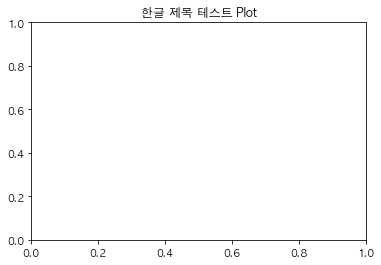

In [10]:
plt.figure().add_subplot().set_title('한글 제목 테스트 Plot')
plt.plot(x, y)

In [5]:
import matplotlib.font_manager as fm
font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

['/opt/X11/share/system_fonts/Supplemental/STIXNonUniBol.otf',
 '/opt/X11/share/system_fonts/Supplemental/STIXNonUni.otf',
 '/opt/X11/share/system_fonts/Avenir.ttc',
 '/opt/X11/share/system_fonts/Supplemental/STIXIntUpSmBol.otf',
 '/opt/X11/share/system_fonts/Supplemental/Chalkduster.ttf',
 '/opt/X11/share/system_fonts/Supplemental/NotoSansCarian-Regular.ttf',
 '/opt/X11/share/system_fonts/Supplemental/STIXIntUpDReg.otf',
 '/opt/X11/share/system_fonts/Supplemental/PTSerifCaption.ttc',
 '/System/Library/Fonts/Supplemental/NotoSansUgaritic-Regular.ttf',
 '/opt/X11/share/system_fonts/Supplemental/NotoSansTakri-Regular.ttf',
 '/System/Library/Fonts/Supplemental/Bangla Sangam MN.ttc',
 '/System/Library/Fonts/Supplemental/NotoSansThaana-Regular.ttf',
 '/System/Library/Fonts/Supplemental/NotoSansMiao-Regular.ttf',
 '/opt/X11/share/system_fonts/Supplemental/NotoSansCypriot-Regular.ttf',
 '/opt/X11/share/system_fonts/Supplemental/NotoSansAvestan-Regular.ttf',
 '/System/Library/Fonts/Supplementa